In [10]:
from dataclasses import dataclass
from typing import Literal

@dataclass
class PortfolioState:
    amount_usd: float = 0.0
    total_usd: float = 0.0
    total: float = 0.0
    target_currency : Literal["INR","EUR"] = "EUR"

In [12]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state.total_usd = state.amount_usd * 1.08
    return state
def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state.total = state.total_usd / 1.16
    return state
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state.total = state.total_usd * 85
    return state
def choose_conversion(state: PortfolioState) -> str:
    return state.target_currency

In [13]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total", calc_total)
builder.add_node("convert_eur", convert_to_eur)
builder.add_node("convert_inr", convert_to_inr)

builder.add_edge(START, "calc_total")
builder.add_conditional_edges(
    "calc_total",
    choose_conversion,
    {
        "INR": "convert_inr",
        "EUR": "convert_eur",
    }

)

builder.add_edge(["convert_inr","convert_eur"], END)

graph = builder.compile()

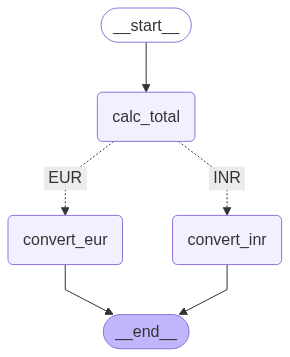

In [14]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
graph.invoke({"amount_usd": 1000, "target_currency": "EUR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'total': 931.0344827586207,
 'target_currency': 'EUR'}